<a href="https://colab.research.google.com/github/9NINE21/Stock-Recommendation-and-Prediction-System/blob/main/Recommendation_System1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install chromadb
!pip install -U sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 2.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.1/611.1 kB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 49.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.6/278.6 kB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 53.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.6/101.6 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.6/166.6 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.3/64.3 kB 5.5 MB/s eta 0:0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.2 MB/s eta 0:00:00
  Attempting uninstall: sentence-transformers
    Found existing installation: sentence-transformers 3.3.1
    Uninstalling sentence-transformers-3.3.1:
      Successfully uninstalled sentence-transformers-3.3.1


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv('/content/Book1.csv')

In [ ]:
df.head(5)

,Security Id,Symbol,Security Name,Sector,Price,Fifty Two Week High,Fifty Two Week Low,Market Capitalization (Rs) (Amt in millions),Volatility,Cap_Category,Investment Planning,Budget,Returns,Cash Dividend
0,397,ADBL,Agricultural Development Bank Limited,CommercialBanks,367.0,428.4,220.5,49367.64,Medium,Smallcap,Longterm,Mid-Price,UndervaluedwithStable returns,7.53%
1,348,CZBIL,Citizens Bank International Limited,CommercialBanks,242.0,296.0,152.5,35741.01,High,Smallcap,Shortterm,Low-Price,Highgrowthpotential,0.21%
2,137,EBL,Everest Bank Limited,CommercialBanks,605.0,790.0,452.0,78315.40,Low,Largecap,Longterm,Mid-Price,UndervaluedwithStable returns,5.53%
3,341,GBIME,Global IME Bank Limited,CommercialBanks,256.1,302.0,170.0,92525.78,Medium,Largecap,Longterm,Low-Price,Highgrowthpotential,0.00%
4,134,HBL,Himalayan Bank Limited,CommercialBanks,261.9,312.1,167.1,56718.68,Medium,Midcap,Shortterm,Low-Price,UndervaluedwithStablereturns,11.11%


In [ ]:
df.columns


Index(['Security Id', 'Symbol', 'Security Name', 'Sector', 'Price',
       'Fifty Two Week High', 'Fifty Two Week Low',
       'Market Capitalization (Rs) (Amt in millions) ', 'Volatility',
       'Cap_Category', 'Investment Planning', 'Budget', 'Returns',
       'Cash Dividend'],
      dtype='object')

In [ ]:
df.tail(2)

,Security Id,Symbol,Security Name,Sector,Price,Fifty Two Week High,Fifty Two Week Low,Market Capitalization (Rs) (Amt in millions),Volatility,Cap_Category,Investment Planning,Budget,Returns,Cash Dividend
47,256,SFCL,Samriddhi Finance Company Limited,Finance,704.1,812.0,246.2,5765.96,High,Midcap,Shortterm,Mid-Price,UndervaluedwithStablereturns,0.26%
48,244,SIFC,Shree Investment Finance Co. Ltd.,Finance,620.0,795.0,300.1,6086.44,Medium,Midcap,Shortterm,Mid-Price,Highgrowthpotential,0.26%


In [ ]:
weights={
    'Investment Planning':1.7,
    'Budget':2,
    'Cap_Category':1.8,
    'Volatility':1.9,
    'Returns': 1.7
}

In [ ]:
numeric_columns = ['Price', 'Market Capitalization (Rs) (Amt in millions) ','Cash Dividend']
for col in numeric_columns:
        # Convert columns to numeric, handling commas and errors
        df[col] = pd.to_numeric(df[col].astype(str).str.replace(',', ''), errors='coerce')


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numerical_data = scaler.fit_transform(df[[col]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/_array_api.py:776: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmin(X, axis=axis))
/usr/local/lib/python3.11/dist-packages/sklearn/utils/_array_api.py:793: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmax(X, axis=axis))


In [ ]:
feature1 = df['Symbol'] + ' ' + df['Security Name']
feature2 = df['Returns']
feature2=feature2.str.lower()
feature4 = df['Volatility']
feature4=feature4.str.lower()
feature5 = df['Budget']
feature5=feature5.str.lower()
feature6 = df['Cap_Category']
feature6=feature6.str.lower()
feature7 = df['Investment Planning']
feature7=feature7.str.lower()

In [ ]:
feature8=df['Symbol']+' '+df['Security Name']+' '+df['Sector']+' '+df['Cap_Category']+' '+df['Investment Planning']+' '+' '+df['Budget']+' '+df['Volatility']+df['Returns']+' '
feature8=feature8.str.lower()

In [ ]:
from sentence_transformers import SentenceTransformer

# Load https://huggingface.co/sentence-transformers/all-mpnet-base-v2
model = SentenceTransformer("all-mpnet-base-v2")
embeddings1 = model.encode(feature1.values)
embeddings2 = model.encode(feature2.values)
embeddings4 = model.encode(feature4.values)
embeddings5 = model.encode(feature5.values)
embeddings6 = model.encode(feature6.values)
embeddings7 = model.encode(feature7.values)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
from sklearn.preprocessing import normalize

embeddings1 = normalize(embeddings1)
embeddings2 = normalize(embeddings2)
embeddings4 = normalize(embeddings4)
embeddings5 = normalize(embeddings5)
embeddings6 = normalize(embeddings6)
embeddings7 = normalize(embeddings7)

In [ ]:
embeddings1

array([[-0.01069013, -0.02966264,  0.00204263, ..., -0.02239203,
        -0.02389382,  0.0307021 ],
       [ 0.04557997, -0.05452798,  0.01000026, ..., -0.0597647 ,
        -0.01944831,  0.00389521],
       [ 0.03185331, -0.04587081,  0.00348569, ..., -0.02077116,
        -0.07086612, -0.00995158],
       ...,
       [ 0.05614204, -0.03736302, -0.00306601, ..., -0.01779926,
        -0.06421894,  0.01651355],
       [ 0.03972695, -0.04946683,  0.00760194, ...,  0.00948067,
        -0.04405833,  0.00062187],
       [ 0.01619821, -0.05556842, -0.00072521, ...,  0.00605197,
        -0.01045872, -0.00065106]], dtype=float32)

In [ ]:
embeddings2

array([[-0.03744624,  0.01034459,  0.03080126, ...,  0.01746445,
         0.07818305, -0.01365933],
       [-0.0541375 , -0.03676928, -0.00147994, ..., -0.02191219,
        -0.04409186, -0.01425899],
       [-0.03744624,  0.01034459,  0.03080126, ...,  0.01746445,
         0.07818305, -0.01365933],
       ...,
       [-0.07538188, -0.02163398,  0.00546261, ...,  0.04142931,
         0.05385552,  0.00656717],
       [-0.07538188, -0.02163398,  0.00546261, ...,  0.04142931,
         0.05385552,  0.00656717],
       [-0.0541375 , -0.03676928, -0.00147994, ..., -0.02191219,
        -0.04409186, -0.01425899]], dtype=float32)

In [ ]:
numerical_data = np.nan_to_num(numerical_data, nan=0.0)

In [ ]:

weighted_embeddings = (
    embeddings1 +
    weights['Returns'] * np.array(embeddings2) +
    weights['Volatility'] * np.array(embeddings4) +
    weights['Budget'] * np.array(embeddings5) +
    weights['Cap_Category'] * np.array(embeddings6) +
    weights['Investment Planning'] * np.array(embeddings7)+ numerical_data
)

In [ ]:
normalized_embeddings = normalize(weighted_embeddings)

In [ ]:
composite_embedding = normalized_embeddings.tolist()

In [ ]:
df.dtypes

,0
Security Id,int64
Symbol,object
Security Name,object
Sector,object
Price,float64
Fifty Two Week High,float64
Fifty Two Week Low,float64
Market Capitalization (Rs) (Amt in millions),float64
Volatility,object
Cap_Category,object


In [ ]:
ids = df['Security Id'].astype(str).values.tolist()

In [ ]:
metadata_columns=['Security Id','Symbol','Security Name','Price','Fifty Two Week High','Sector',
       'Fifty Two Week Low','Market Capitalization (Rs) (Amt in millions) ','Cap_Category','Cash Dividend']

metadata = df[metadata_columns].to_dict('records')

In [ ]:
import chromadb
client = chromadb.PersistentClient(path="/content/chromadb_storage")


In [ ]:
collection = client.create_collection(name="vector_db", metadata={"hnsw:space": "cosine"})


In [ ]:

collection.add(ids=ids,
               documents=feature8.values.tolist(),
               embeddings=weighted_embeddings,
               metadatas=metadata)

In [ ]:
user_market_cap_preference=input("Which category of banks do you prefer based on market capitalization?:(Large-cap/Mid-cap/Small-cap):")
user_investment = input("What is your planned   intial investment amount in commercial ba Drnk stocks?:(Low-Price/Mid-Price/High-Price): ")
user_return_preference = input("Do you prefer investing in banks with high growth potential or undervalued stocks with stable returns?: (HighGrowthPotential/UndervaluedwithStableReturns): ")
user_risk_preference = input("How would you describe your risk appetite for investing in commercial bank stocks?: (Low/Medium/High): ")
user_time_tolerance = input("What is your preferred investment duration for commercial bank stocks?: (Short-term//Long-term): ")

Which category of banks do you prefer based on market capitalization?:(Large-cap/Mid-cap/Small-cap):Large-cap
What is your planned   intial investment amount in commercial ba Drnk stocks?:(Low-Price/Mid-Price/High-Price): Mid-price
Do you prefer investing in banks with high growth potential or undervalued stocks with stable returns?: (HighGrowthPotential/UndervaluedwithStableReturns): UndervaluedwithStableReturns
How would you describe your risk appetite for investing in commercial bank stocks?: (Low/Medium/High): Low
What is your preferred investment duration for commercial bank stocks?: (Short-term//Long-term): Long-term


In [ ]:
import re
selected_cap = [cap.strip() for cap in re.split(r'[,\s]+', user_market_cap_preference) if cap.strip()]
print("Selected cap:", selected_cap)

Selected cap: ['Large-cap']


In [ ]:
import re
selected_time = [time.strip() for time in re.split(r'[,\s]+', user_time_tolerance) if time.strip()]
print("Selected time:", selected_time)

Selected time: ['Long-term']


In [ ]:
user_features = f" retrun: {user_return_preference}, " \
                f"Investment horizon: {user_investment}, " \
                f"CAP preference: {','.join(selected_cap)}," \
                f"Risk preference: {user_risk_preference}, " \
                f"Time preference: {','.join(selected_time)},"

In [ ]:
user_features

' retrun: UndervaluedwithStableReturns, Investment horizon: Mid-price, CAP preference: Large-cap,Risk preference: Low, Time preference: Long-term,'

In [ ]:
model = SentenceTransformer("all-mpnet-base-v2")

In [ ]:
cap_embeddings = []
for cap in selected_cap:
    cap_emb = model.encode([cap]).flatten()
    cap_embeddings.append(cap_emb)

# Calculate combined sector embedding
if cap_embeddings:
    combined_cap_embedding = np.mean(cap_embeddings, axis=0)
    cap_embedding = normalize([combined_cap_embedding])*weights['Cap_Category']
else:
    cap_embedding = normalize([model.encode(['']).flatten()]) * weights['Cap_Category']

In [ ]:
time_embeddings = []
for time in selected_time:
    time_emb = model.encode([time]).flatten()
    time_embeddings.append(time_emb)

# Calculate combined sector embedding
if time_embeddings:
    combined_time_embedding = np.mean(time_embeddings, axis=0)
    time_embedding = normalize([combined_time_embedding]) * weights['Investment Planning']
else:
    time_embedding = normalize([model.encode(['']).flatten()]) * weights['Investment Planning']

In [ ]:
investment_horizon_embedding = normalize([model.encode([user_investment]).flatten()]) * weights['Budget']
risk_tolerance_embedding = normalize([model.encode([user_risk_preference]).flatten()]) * weights['Volatility']
return_preference_embedding = normalize([model.encode([user_return_preference]).flatten()])*weights['Returns']




In [ ]:
user_embedding = (
    cap_embedding +
    investment_horizon_embedding +
    risk_tolerance_embedding+
    return_preference_embedding+
    time_embedding
).tolist()

In [ ]:
recommendations = collection.query(
    query_embeddings=user_embedding,
    n_results=10
)
print(recommendations)

{'ids': [['137', '274', '133', '227', '142', '401', '587', '358', '132', '357']], 'embeddings': None, 'documents': [['ebl everest bank limited commercialbanks largecap longterm  mid-price lowundervaluedwithstable returns ', 'edbl excel development bank ltd. developmentbanks smallcap longterm  mid-price lowundervaluedwithstablereturns ', 'scb standard chartered bank limited commercialbanks midcap longterm  high-price lowundervaluedwithstablereturns ', 'bfc best finance company ltd. finance midcap shorterm  mid-price lowundervaluedwithstablereturns ', 'kbl kumari bank limited commercialbanks midcap longterm  low-price mediumundervaluedwithstablereturns ', 'mlbl mahalaxmi bikas bank ltd. developmentbanks midcap longterm  low-price mediumundervaluedwithstablereturns ', 'rlfl reliance finance ltd. finance midcap shortterm  mid-price highundervaluedwithstablereturns ', 'lbbl lumbini bikas bank ltd. developmentbanks midcap shortterm  low-price lowundervaluedwithstablereturns ', 'nimb nepal in

In [ ]:
import random


In [ ]:
# Load the pre-trained model
model = SentenceTransformer('all-mpnet-base-v2')

# Define feature weights
weights = {
    'Investment Planning': 1.7,
    'Budget': 2,
    'Cap_Category': 1.8,
    'Volatility': 1.9,
    'Returns': 1.7
}

def generate_random_user_profile():
    """
    Generate a random user profile with preferences.
    """
    options = {
        "market_cap": ["Large-cap", "Mid-cap", "Small-cap"],
        "investment": ["Low-Price", "Mid-Price", "High-Price"],
        "risk": ["Low", "Medium", "High"],
        "returns": ["HighGrowthPotential", "UndervaluedwithStableReturns"],
        "investment_time": ["Shortterm", "Longterm"],
    }
    return {key: random.choice(values) for key, values in options.items()}

def process_test_cases(num_test_cases=100):
    """
    Generate and process test cases.

    Args:
        num_test_cases (int): Number of test cases to generate and process.
    """
    # Generate test cases
    test_cases = [generate_random_user_profile() for _ in range(num_test_cases)]

    # Process each test case
    for i, test_case in enumerate(test_cases):
        print(f"\nProcessing Test Case {i + 1}:")

        # Assign values from the test case to variables
        user_market_cap_preference = test_case["market_cap"]
        user_investment = test_case["investment"]
        user_return_preference = test_case["returns"]
        user_risk_preference = test_case["risk"]
        user_time_tolerance = test_case["investment_time"]

        # Print the assigned values (for debugging)
        print(f"User Preferences for Test Case {i + 1}:")
        print(f"Market Cap Preference: {user_market_cap_preference}")
        print(f"Investment: {user_investment}")
        print(f"Return Preference: {user_return_preference}")
        print(f"Risk Preference: {user_risk_preference}")
        print(f"Time Tolerance: {user_time_tolerance}")

        # Generate user embedding
        user_embedding = generate_user_embedding(test_case)

        # Query the vector store for recommendations
        recommendations = collection.query(
            query_embeddings=[user_embedding],  # User embedding
            n_results=4  # Number of recommendations to return
        )

        # Print recommendations
        print("Recommended Stocks:")
        for j, stock in enumerate(recommendations['documents'][0]):  # Access the first query result
            print(f"  {j + 1}. {stock}")
        print("\n")


In [ ]:
immport

In [ ]:
def generate_user_embedding(profile):
    """
    Generate a user embedding based on the provided profile.

    Args:
        profile (dict): Dictionary containing user preferences.

    Returns:
        list: Final concatenated user embedding.
    """
    # Extract preferences from the profile
    user_market_cap_preference = profile["market_cap"]
    user_investment = profile["investment"]
    user_return_preference = profile["returns"]
    user_risk_preference = profile["risk"]
    user_time_tolerance = profile["investment_time"]

    # Process market capitalization preferences
    selected_cap = [cap.strip() for cap in re.split(r'[,\s]+', user_market_cap_preference) if cap.strip()]
    cap_embeddings = [model.encode([cap]).flatten() for cap in selected_cap]
    if cap_embeddings:
        combined_cap_embedding = np.mean(cap_embeddings, axis=0)
        cap_embedding = normalize([combined_cap_embedding]) * weights['Cap_Category']
    else:
        cap_embedding = normalize([model.encode(['']).flatten()]) * weights['Cap_Category']

    # Process investment time preferences
    selected_time = [time.strip() for time in re.split(r'[,\s]+', user_time_tolerance) if time.strip()]
    time_embeddings = [model.encode([time]).flatten() for time in selected_time]
    if time_embeddings:
        combined_time_embedding = np.mean(time_embeddings, axis=0)
        time_embedding = normalize([combined_time_embedding]) * weights['Investment Planning']
    else:
        time_embedding = normalize([model.encode(['']).flatten()]) * weights['Investment Planning']

    # Encode other individual profile features
    investment_horizon_embedding = normalize([model.encode([user_investment]).flatten()]) * weights['Budget']
    risk_tolerance_embedding = normalize([model.encode([user_risk_preference]).flatten()]) * weights['Volatility']
    return_preference_embedding = normalize([model.encode([user_return_preference]).flatten()]) * weights['Returns']

    # Concatenate all embeddings into a single vector and flatten
    user_embedding = (
        cap_embedding +
        investment_horizon_embedding +
        risk_tolerance_embedding +
        return_preference_embedding +
        time_embedding
    )

    # Normalize the final embedding
    user_embedding = normalize(user_embedding).flatten().tolist()

    return user_embedding

In [ ]:
# Run the process for 100 test cases
process_test_cases(num_test_cases=100)


Processing Test Case 1:
User Preferences for Test Case 1:
Market Cap Preference: Small-cap
Investment: Mid-Price
Return Preference: UndervaluedwithStableReturns
Risk Preference: Medium
Time Tolerance: Longterm
Recommended Stocks:
  1. sindu sindhu bikash bank ltd developmentbanks smallcap longterm  mid-price mediumundervaluedwithstablereturns 
  2. profl progressive finance limited finance midcap longterm  mid-price mediumundervaluedwithstablereturns 
  3. edbl excel development bank ltd. developmentbanks smallcap longterm  mid-price lowundervaluedwithstablereturns 
  4. bfc best finance company ltd. finance midcap shorterm  mid-price lowundervaluedwithstablereturns 



Processing Test Case 2:
User Preferences for Test Case 2:
Market Cap Preference: Small-cap
Investment: High-Price
Return Preference: UndervaluedwithStableReturns
Risk Preference: High
Time Tolerance: Longterm
Recommended Stocks:
  1. grdbl green development bank ltd. developmentbanks smallcap longterm  high-price highh

In [ ]:
def generate_ground_truth(test_case, df, weights, limit=4):
    """
    Generate ground truth recommendations based on weighted matching conditions.

    Args:
        test_case (dict): User profile with preferences.
        df (DataFrame): DataFrame containing stock metadata.
        weights (dict): Weights for each condition.
        limit (int): Maximum number of stocks to include in the ground truth.

    Returns:
        list: Ground truth recommendations (stock IDs or names).
    """
    # Extract user preferences
    market_cap = test_case["market_cap"].strip().lower()
    investment = test_case["investment"].strip().lower()
    returns = test_case["returns"].strip().lower()
    risk = test_case["risk"].strip().lower()
    investment_time = test_case["investment_time"].strip().lower()

    # Initialize a list to store weighted scores
    weighted_scores = []

    for index, row in df.iterrows():  # Iterate through rows
        # Calculate the weighted score
        score = 0
        if row["Cap_Category"].strip()== market_cap:
            score += weights["Cap_Category"]
        if row["Budget"].strip()== investment:
            score += weights["Budget"]
        if row["Returns"].strip() == returns:
            score += weights["Returns"]
        if row["Volatility"].strip() == risk:
            score += weights["Volatility"]
        if row["Investment Planning"].strip() == investment_time:
            score += weights["Investment Planning"]

        # Store the weighted score and stock symbol
        weighted_scores.append((score, row["Symbol"]))

    # Sort stocks by the weighted score in descending order
    weighted_scores.sort(reverse=True, key=lambda x: x[0])

    # Select the top 'limit' stocks
    ground_truth = [symbol for score, symbol in weighted_scores[:limit]]

    return ground_truth

In [ ]:
df["Cap_Category"] = df["Cap_Category"].str.strip().str.lower()
df["Budget"] = df["Budget"].str.strip().str.lower()
df["Returns"] = df["Returns"].str.strip().str.lower()
df["Volatility"] = df["Volatility"].str.strip().str.lower()
df["Investment Planning"] = df["Investment Planning"].str.strip().str.lower()

# Example test case
test_case = {
    "market_cap": "largecap",
    "investment": "mid-price",
    "returns": "highgrowthpotential",
    "risk": "medium",
    "investment_time": "longterm"
}

# Generate ground truth
ground_truth = generate_ground_truth(test_case, df, weights, limit=4)
print("Ground Truth:", ground_truth)

Ground Truth: ['GFCL', 'ICFC', 'MFIL', 'GBIME']


In [ ]:
def evaluate_recommendations(recommendations, ground_truths):
    """
    Evaluate the system's recommendations against the ground truth.

    Args:
        recommendations (list): System's recommendations for each test case.
        ground_truths (list): Ground truth recommendations for each test case.

    Returns:
        dict: Evaluation metrics (e.g., accuracy, precision, recall).
    """
    accuracy_scores = []
    precision_scores = []
    recall_scores = []

    for rec, gt in zip(recommendations, ground_truths):
        # Convert recommendations and ground truth to sets for comparison
        rec_set = set([stock.lower() for stock in rec])
        gt_set = set([stock.lower() for stock in gt])

        # Calculate metrics
        tp = len(rec_set.intersection(gt_set))  # True positives
        fp = len(rec_set - gt_set)  # False positives
        fn = len(gt_set - rec_set)  # False negatives

        accuracy = tp / len(rec_set) if len(rec_set) > 0 else 0
        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0

        accuracy_scores.append(accuracy)
        precision_scores.append(precision)
        recall_scores.append(recall)

    # Calculate average metrics
    avg_accuracy = np.mean(accuracy_scores)
    avg_precision = np.mean(precision_scores)
    avg_recall = np.mean(recall_scores)

    return {
        "average_accuracy": avg_accuracy,
        "average_precision": avg_precision,
        "average_recall": avg_recall
    }

In [ ]:
from sklearn.metrics import confusion_matrix

def calculate_confusion_matrix(recommendations, ground_truths, all_stocks):
    """
    Calculate the confusion matrix for the recommendations.

    Args:
        recommendations (list): System's recommendations for each test case.
        ground_truths (list): Ground truth recommendations for each test case.
        all_stocks (list): List of all possible stocks.

    Returns:
        np.array: Confusion matrix.
    """
    y_true = []
    y_pred = []

    for rec, gt in zip(recommendations, ground_truths):
        rec_lower = [stock.lower() for stock in rec]
        gt_lower = [stock.lower() for stock in gt]

        # Convert recommendations and ground truth to binary vectors
        y_true.append([1 if stock in gt else 0 for stock in all_stocks])
        y_pred.append([1 if stock in rec else 0 for stock in all_stocks])

    # Flatten the lists
    y_true = np.array(y_true).flatten()
    y_pred = np.array(y_pred).flatten()

    # Calculate confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    return cm

In [ ]:
# Generate test cases
test_cases = [generate_random_user_profile() for _ in range(100)]

recommendations = []
for test_case in test_cases:
    # Generate user embedding
    user_embedding = generate_user_embedding(test_case)

    # Query the vector store for recommendations
    result = collection.query(
        query_embeddings=[user_embedding],
        n_results=4
    )
    recommendations.append(result['documents'][0])

# Convert recommendations to lowercase
recommendations_lower = [[stock.lower() for stock in rec] for rec in recommendations]

# Generate ground truth for all test cases
ground_truths = []
for test_case in test_cases:
    ground_truth = generate_ground_truth(test_case, df, weights, limit=4)
    ground_truths.append(ground_truth)

# Convert ground truth to lowercase
ground_truths_lower = [[stock.lower() for stock in gt] for gt in ground_truths]

# Evaluate recommendations using normalized data
evaluation_metrics = evaluate_recommendations(recommendations_lower, ground_truths_lower)
print("Evaluation Metrics:")
print(f"Average Accuracy: {evaluation_metrics['average_accuracy']:.2f}")
print(f"Average Precision: {evaluation_metrics['average_precision']:.2f}")
print(f"Average Recall: {evaluation_metrics['average_recall']:.2f}")

# Calculate confusion matrix using normalized data
all_stocks = df["Symbol"].tolist()  # List of all possible stocks
all_stocks_lower = [stock.lower() for stock in all_stocks]  # Normalize case
cm = calculate_confusion_matrix(recommendations_lower, ground_truths_lower, all_stocks_lower)
print("Confusion Matrix:")
print(cm)

In [ ]:
for i in range(5):  # Check the first 5 test cases
    print(f"Test Case {i + 1}:")
    print(f"Recommendations: {recommendations[i]}")
    print(f"Ground Truth: {ground_truths[i]}")
    print()

In [ ]:
df1= df1.drop(columns=['Recommendations', 'First Match'], inplace=True)

In [ ]:
df1

,Test Case,Ground Truth,Normalized Recommendations
0,1,"['CZBIL', 'MBL', 'PRVU', 'SADBL']","['LBBL', 'JFL', 'RLFL', 'SFCL']"
1,2,"['CZBIL', 'PRVU', 'SADBL', 'GMFIL']","['PRVU', 'GMFIL', 'SADBL', 'NFS']"
2,3,"['MDB', 'GUFL', 'MPFL', 'SANIMA']","['MDB', 'GUFL', 'PFL', 'ICFC']"
3,4,"['GBIME', 'HBL', 'LSL', 'JBBL']","['NBL', 'GBIME', 'CZBIL', 'SADBL']"
4,5,"['SBL', 'SANIMA', 'ICFC', 'MFIL']","['SBL', 'SANIMA', 'MFIL', 'ICFC']"
...,...,...,...
95,96,"['GBIME', 'KBL', 'NIMB', 'NMB']","['GBIME', 'GFCL', 'MFIL', 'ICFC']"
96,97,"['GBIME', 'HBL', 'LSL', 'JBBL']","['GBIME', 'NBL', 'SADBL', 'GMFIL']"
97,98,"['CORBL', 'NFS', 'JFL', 'RLFL']","['SCB', 'RLFL', 'SFCL', 'JFL']"
98,99,"['JFL', 'RLFL', 'SFCL', 'MPFL']","['RLFL', 'SFCL', 'JFL', 'BFC']"


Precision: 0.8861454046639232
Recall: 0.8624833110814419
F1-score: 0.8741542625169147
Accuracy: 0.8569
Confusion Matrices (one per label):
Label 0:
[[  0   0]
 [  0 100]]
Label 1:
[[  0   0]
 [  0 100]]
Label 2:
[[  0   0]
 [  0 100]]
Label 3:
[[37  8]
 [12 43]]
Label 4:
[[ 0  2]
 [ 7 91]]
Label 5:
[[11 19]
 [18 52]]
Label 6:
[[38 13]
 [15 34]]
Label 7:
[[68 14]
 [ 5 13]]
Label 8:
[[25 24]
 [ 4 47]]
Label 9:
[[49 11]
 [12 28]]
Label 10:
[[75 10]
 [ 7  8]]
Label 11:
[[17  1]
 [15 67]]
Label 12:
[[70  4]
 [15 11]]
Label 13:
[[83  0]
 [ 9  8]]
Label 14:
[[  0   0]
 [  0 100]]
Label 15:
[[33 13]
 [ 9 45]]
Label 16:
[[22 13]
 [16 49]]
Label 17:
[[73  2]
 [ 9 16]]
Label 18:
[[45 13]
 [10 32]]
Label 19:
[[44  3]
 [13 40]]
Label 20:
[[ 8 11]
 [ 7 74]]
Label 21:
[[67  2]
 [ 7 24]]
Label 22:
[[86  1]
 [ 7  6]]
Label 23:
[[85  2]
 [ 9  4]]
Label 24:
[[  0   0]
 [  0 100]]
Label 25:
[[  0   0]
 [  0 100]]


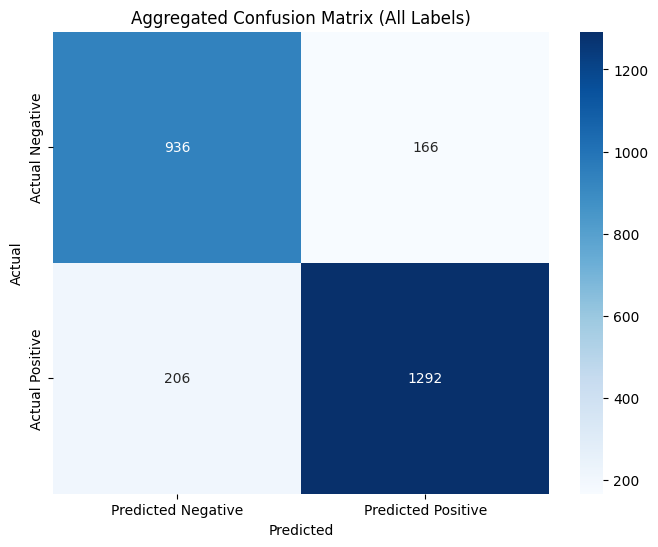

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, multilabel_confusion_matrix
from sklearn.preprocessing import MultiLabelBinarizer
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Step 1: Prepare the data
# Extract ground truth and normalized recommendations
ground_truth = df1['Ground Truth']
predicted_recommendations = df1['Normalized Recommendations']

# Step 2: Create a MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Fit the binarizer on all unique labels from both ground truth and predictions
all_labels = set()
for gt, pred in zip(ground_truth, predicted_recommendations):
    all_labels.update(gt)
    all_labels.update(pred)
mlb.fit([list(all_labels)])  # Fit on a list of all unique labels

# Step 3: Transform ground truth and predictions into binary arrays
y_true_binary = mlb.transform(ground_truth)
y_pred_binary = mlb.transform(predicted_recommendations)

# Step 4: Compute evaluation metrics
# Precision (micro-averaged)
precision = precision_score(y_true_binary, y_pred_binary, average='micro')

# Recall (micro-averaged)
recall = recall_score(y_true_binary, y_pred_binary, average='micro')

# F1-score (micro-averaged)
f1 = f1_score(y_true_binary, y_pred_binary, average='micro')

accuracy = accuracy_score(y_true_binary.ravel(), y_pred_binary.ravel())

# Confusion Matrix (for each label)
confusion_matrices = multilabel_confusion_matrix(y_true_binary, y_pred_binary)

# Step 5: Print the results
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrices (one per label):")
for i, cm in enumerate(confusion_matrices):
    print(f"Label {i}:\n{cm}")
sum_tn = sum_fp = sum_fn = sum_tp = 0

for cm in confusion_matrices:
    tn, fp, fn, tp = cm.ravel()
    sum_tn += tn
    sum_fp += fp
    sum_fn += fn
    sum_tp += tp

# Create aggregated confusion matrix
aggregated_cm = np.array([[sum_tn, sum_fp],
                          [sum_fn, sum_tp]])

# Visualize the aggregated confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(aggregated_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Aggregated Confusion Matrix (All Labels)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
